# **Plot time-series data and identify patterns.**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned_dataset.csv')

In [9]:
# 1: Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True)

# 2: Set Timestamp as index (optional for time series)
df.set_index('Timestamp', inplace=True)

# 3: Resample data to daily level (sum of likes per day)
daily_likes = df['Likes'].resample('D').sum()


/tmp/ipython-input-4220157715.py:2: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True)


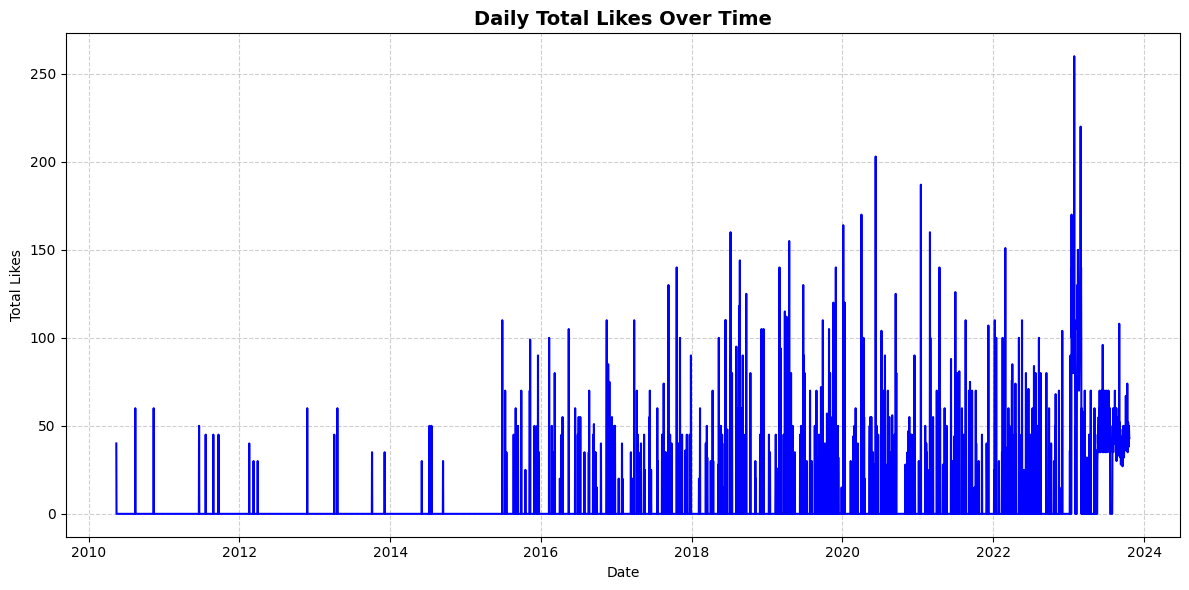

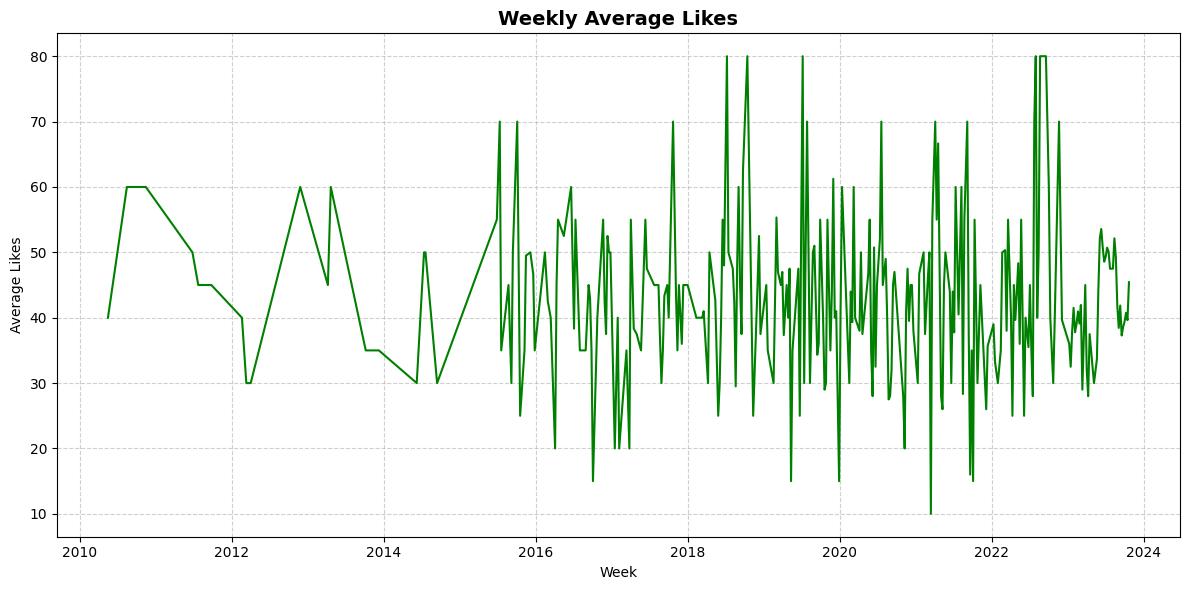

In [10]:
# 4: Plot time-series of Likes
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_likes, color='blue')
plt.title('Daily Total Likes Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Total Likes')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#5: Weekly average likes
weekly_avg_likes = df['Likes'].resample('W').mean()

# Plot weekly average
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_avg_likes, color='green')
plt.title('Weekly Average Likes', fontsize=14, fontweight='bold')
plt.xlabel('Week')
plt.ylabel('Average Likes')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# **Decompose the series into trend, seasonality, and residuals using statsmodels.**

<Figure size 1200x1000 with 0 Axes>

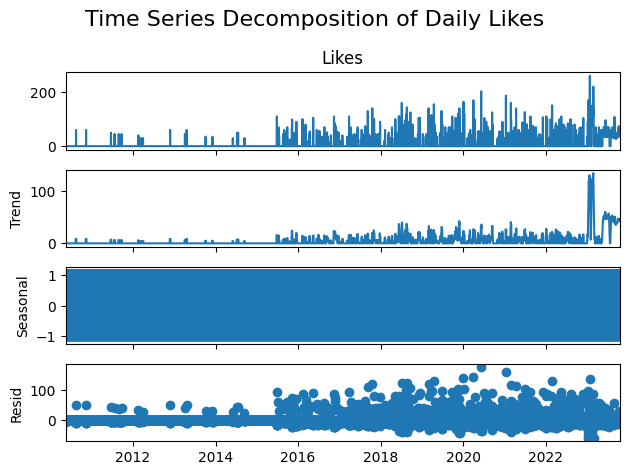

In [11]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# another staep was same as to priveas

# 4: Fill missing dates with 0 (important for decomposition)
daily_likes = daily_likes.fillna(0)

# 5: Decompose the time series (multiplicative or additive)
decomposition = seasonal_decompose(daily_likes, model='additive', period=7)  # weekly seasonality

# 6: Plot the decomposed components
plt.figure(figsize=(12, 10))
decomposition.plot()
plt.suptitle("Time Series Decomposition of Daily Likes", fontsize=16)
plt.tight_layout()
plt.show()

# **Perform moving average smoothing and plot the results.**

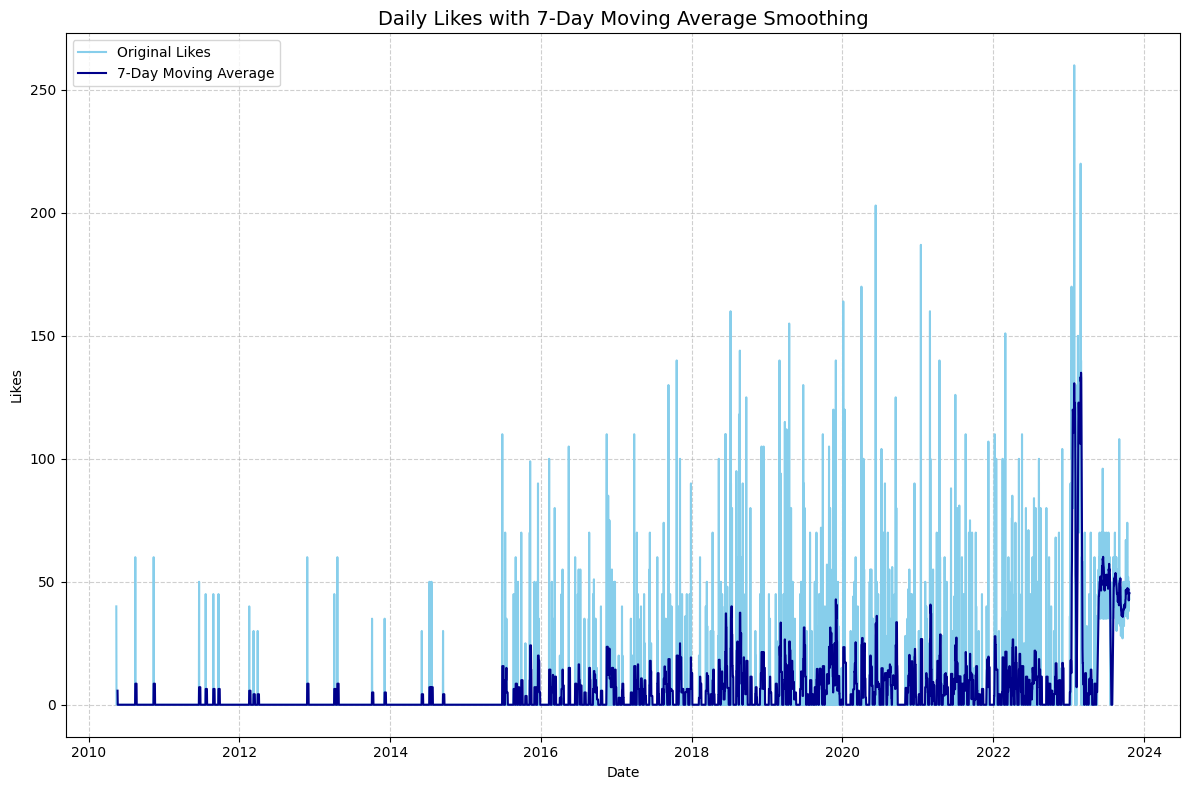

In [12]:
import seaborn as sns
# anoter code step is same as to priveas code

# 4: Apply moving average smoothing
smoothed_likes = daily_likes.rolling(window=7).mean()

# 5: Plot original and smoothed series
plt.figure(figsize=(12, 8))
sns.lineplot(data=daily_likes, label='Original Likes', color='skyblue')
sns.lineplot(data=smoothed_likes, label='7-Day Moving Average', color='darkblue')
plt.title("Daily Likes with 7-Day Moving Average Smoothing", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Likes")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()